# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [1]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.24245755 2.80167451 2.18287456 2.17633058 2.20361816 2.28220295
 2.72015844 2.41734946 2.04652416 2.92862909]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [23]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.62363847 2.31255202 2.87019245 2.00403556 2.54713487 2.21868712
 2.76643147 2.5588071  2.61850882 2.02465937]


In [24]:
# your code here
#Creando función udrn
def udrn (bottom, ceiling, count):
    """ Generates uniformly distributed random numbers given a bottom, ceiling and count"""
    x = uniform.rvs(size = count)
    a = bottom
    b = ceiling
    randoms  = a + (b - a) * x
    return randoms


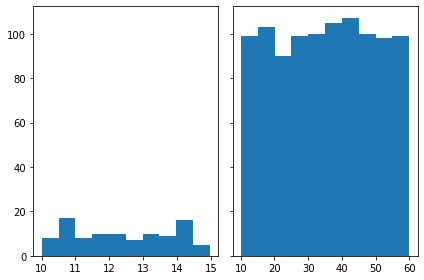

In [42]:
#Usando función
x = udrn(10, 15, 100)
y = udrn (10, 60, 1000)

# Generando gráfica
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins = 10)
axs[1].hist(y, bins = 10);

How are the two distributions different?

In [ ]:
# your answer below

#One has lower density than the other one but for me they look similar.

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [47]:
# your code here
#Importanto librerias
from scipy.stats import norm
import numpy as np
import math
#Creando función
def norm_dist (mean, stdev, count):
    x = np.linspace(mean-4*stdev,mean+4*stdev, count)
    y = norm.pdf(x,mean,stdev)
    
    return x, y

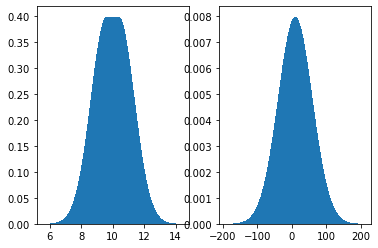

In [48]:
#Graficando
x = norm_dist (10, 1, 1000)
y = norm_dist (10, 50, 1000)
# Imprimí los arreglos porque cuando grafiqué tuve un problema, me imprimió dos arreglos
#print(x)
#print(y)
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.bar(x[0],x[1])
ax2.bar(y[0],y[1]);
#Me salió la gráfica, pero los valores del eje Y no se parecen a los de la imagen
#Tampoco sé si era esta gráfica o cuál era o si fue un error en mi fórmula

How are the two distributions different?

In [ ]:
# your answer below
#Both look similar, but the first one is wider than the second one.

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [50]:
# your code here

#Importando libreria
import pandas as pd

#Importando data

df = pd.read_csv('vehicles.csv')
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


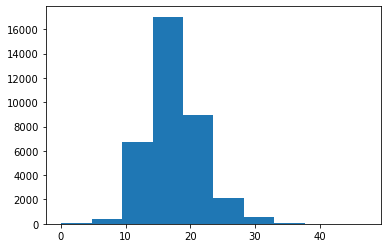

In [54]:
#Graficando

plt.hist(df['Fuel Barrels/Year']);

2. CO2 Emission Grams/Mile 

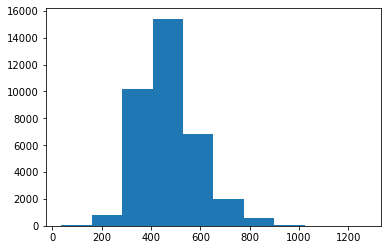

In [55]:
# your code here
plt.hist(df['CO2 Emission Grams/Mile']);

3. Combined MPG

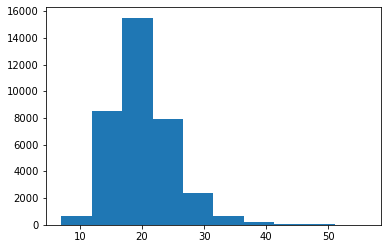

In [56]:
# your code here
plt.hist(df['Combined MPG']);

Which one(s) of the variables are nearly normally distributed? How do you know?

In [57]:
# your answer here
#I would say Combined MPG because we can observe
#nearly the same amount of data if you cut the plot in the middle.


## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 1 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

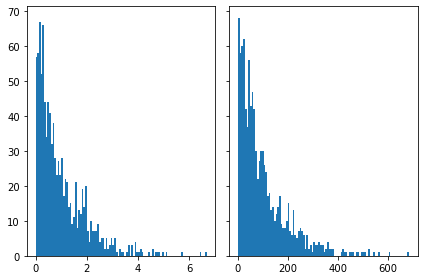

In [110]:
# your code here
def exp_dist (scale):
    y = np.random.exponential (scale, size = 1000)
    return y
x = exp_dist(1)
y = exp_dist (100)

#Graficando
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins = 100)
axs[1].hist(y, bins = 100);

How are the two distributions different?

In [109]:
# your answer here
#Both look similar but in the first one, most of the data is between 0 and 4
# In the second one, data is between 0 and 200

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [118]:
# your answer here
# Hint: This is same as saying P(x<15)


#Importando libreria

from scipy.stats import expon

p = expon.cdf(x = 15, scale = 10 )
p

0.7768698398515702

What is the probability that the customer will spend more than 15 minutes

In [117]:
# your answer here
more = 1 - p
more

0.2231301601484298